# Digital Image Processing Monsoon-2024

Solutions for DIP Assignment-1 

### Importing dependency libraries

In [1]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

## Question 1: Read an Image File into an Array
**Approach:**  
This function uses OpenCV's `cv2.imread` to read an image from a file into a NumPy array. The image is stored as a multi-dimensional array where each pixel's color channels are stored as values.

**Output:**  
The image is read into an array with the shape of `(height, width, channels)`, which indicates the dimensions and color depth.


In [2]:
def read_image(filename):
    image = cv2.imread(filename) 
    return image

def bgr_to_rgb(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = read_image('../media/rings.jpg')
rgb_image = bgr_to_rgb(image)

In [3]:
def show_images(original_image, modified_image, original_title, modified_title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.axis('off')
    plt.title(original_title)
    
    plt.subplot(1, 2, 2)
    plt.imshow(modified_image)
    plt.axis('off')
    plt.title(modified_title)
    
    plt.show()

## Question 2: Write an Array into an Image File
**Approach:**  
This function takes an image array and writes it to a file using OpenCV's `cv2.imwrite`. The image format is determined by the file extension provided.

**Output:**  
The image array is saved as a file on the disk.


In [4]:
def write_image(filename, image):
    cv2.imwrite(filename, image)

## Question 3: Change Brightness of the Image
**Approach:**  
Brightness is adjusted by adding a constant value `delta` to each pixel's color channels. The values are clipped to ensure they remain within the valid range `[0, 255]`.

**Output:**  
The image is displayed showing the original and brightened versions side by side.


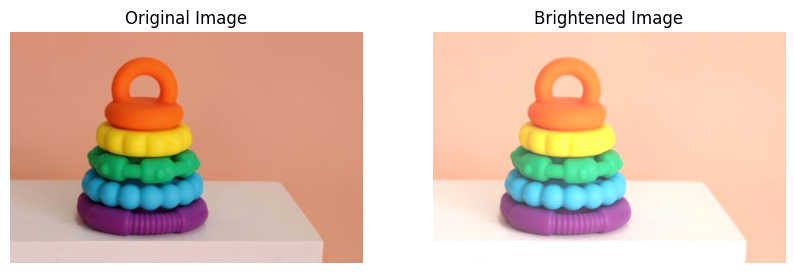

In [5]:
def change_brightness(image, delta):
    brightened_image = []
    for row in image:
        brightened_row = [[min(max(channel + delta, 0), 255) for channel in pixel] for pixel in row]
        brightened_image.append(brightened_row)
    return brightened_image

# Brightness
bright_image = change_brightness(rgb_image, 60)
show_images(rgb_image, bright_image, "Original Image", "Brightened Image")

## Question 4: Change Contrast of the Image
**Approach:**  
Contrast is adjusted using contrast stretching. This method enhances the image by stretching the pixel intensity values to span the full range from [0, 255]. The minimum and maximum intensity values in the original image are identified, and all pixel values are rescaled accordingly to improve the overall contrast.

**Output:**  
The original and contrast-adjusted images are displayed side by side.


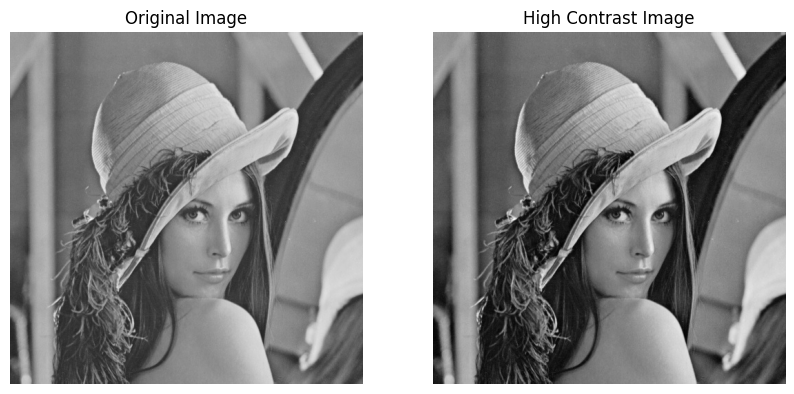

In [13]:
# def change_contrast(image, factor):
#     contrasted_image = []
#     for row in image:
#         contrasted_row = [[min(max(int(channel * factor), 0), 255) for channel in pixel] for pixel in row]
#         contrasted_image.append(contrasted_row)
#     return contrasted_image

def change_contrast(image):
    image = np.array(image)
    min_val = np.min(image)
    max_val = np.max(image)
    stretched_image = (image - min_val) * (255 / (max_val - min_val))
    stretched_image = np.uint8(stretched_image)
    return stretched_image

gray_image=read_image('../media/lena.jpg')
contrast_image = change_contrast(gray_image)
show_images(gray_image, contrast_image, "Original Image", "High Contrast Image")

## Question 5: Convert a Color Image to Grayscale
**Approach:**  
Grayscale conversion can be done in different ways:
- **Average:** Mean of the RGB values.
- **Luminosity:** Weighted sum of RGB values considering human perception.
- **Lightness:** Mean of the max and min RGB values.
- **Desaturation:** Mean of the max, min, and average RGB values.

**Output:**  
Original and grayscale images are displayed side by side.

---

### Methods for Converting a Color Image to Grayscale

There are several methods to convert a color image to grayscale, each producing a slightly different visual effect based on how the grayscale value is calculated from the RGB components of the image.

#### 1. **Average Method**
   - **Approach**: Calculates the grayscale value by averaging the red, green, and blue channels.
   - **Formula**: 
     $$
     \text{Gray} = \frac{R + G + B}{3}
     $$
   - **Visual Effect**: Treats all colors equally, leading to a flat appearance as it doesn't account for the human eye's sensitivity to different colors.

#### 2. **Luminosity Method**
   - **Approach**: Uses a weighted sum of the red, green, and blue channels to calculate the grayscale value. The weights reflect the human eye's greater sensitivity to green light.
   - **Formula**: 
     $$
     \text{Gray} = 0.299 \times R + 0.587 \times G + 0.114 \times B
     $$
   - **Visual Effect**: Provides a more natural-looking grayscale image, emphasizing the green channel, which our eyes are more sensitive to.

#### 3. **Lightness Method**
   - **Approach**: Calculates the grayscale value as the average of the maximum and minimum values of the RGB channels.
   - **Formula**: 
     $$
     \text{Gray} = \frac{\text{max}(R, G, B) + \text{min}(R, G, B)}{2}
     $$
   - **Visual Effect**: Produces a higher contrast grayscale image by considering the extremes of the RGB values.

#### 4. **Desaturation Method**
   - **Approach**: Similar to the lightness method but includes all three RGB values in the calculation.
   - **Formula**: 
     $$
     \text{Gray} = \frac{\text{max}(R, G, B) + \text{min}(R, G, B) + R + G + B}{5}
     $$
   - **Visual Effect**: Provides a more nuanced grayscale image that includes information from all three channels, reducing overall contrast slightly compared to the lightness method.

---

### Visual Effect Comparison

- **Average Method**: Tends to produce a mid-range contrast image without much depth.
- **Luminosity Method**: Produces a more realistic grayscale image that retains the visual emphasis on areas that the human eye would naturally focus on.
- **Lightness Method**: Emphasizes high contrast, making the image appear more dramatic.
- **Desaturation Method**: Balances the image by considering all RGB values but appears slightly less contrasted than the lightness method.


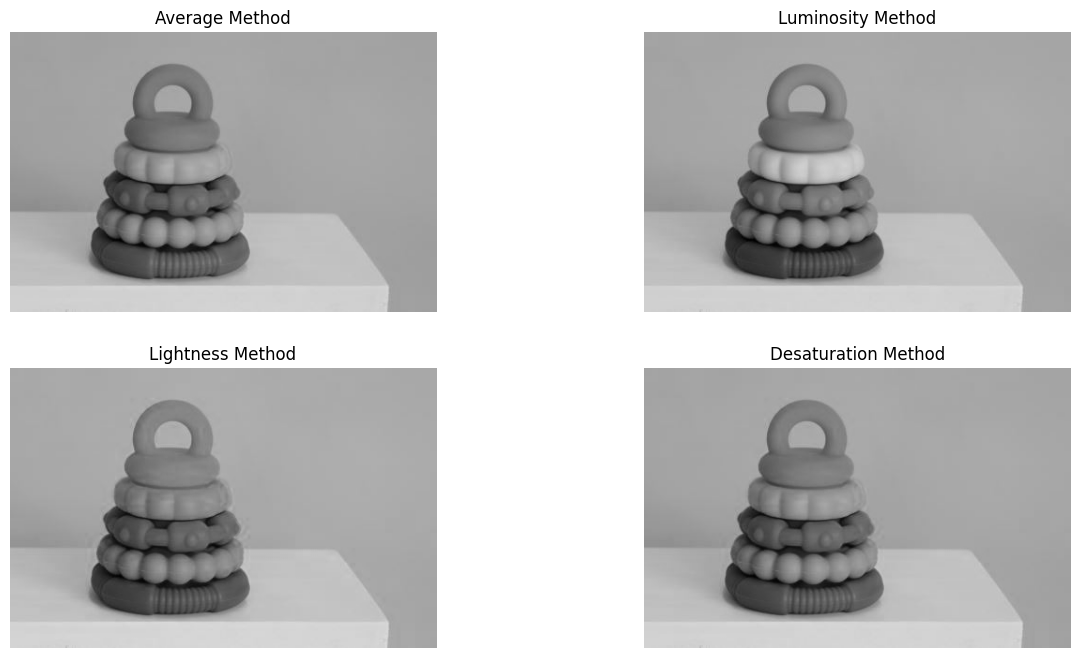

In [7]:
def color_to_grayscale(image, method="luminosity"):
    grayscale_image = []

    for row in image:
        if method == "average":
            grayscale_row = [int((int(r) + int(g) + int(b)) / 3) for r, g, b in row]
        elif method == "luminosity":
            grayscale_row = [int(0.299 * r + 0.587 * g + 0.114 * b) for r, g, b in row]
        elif method == "lightness":
            grayscale_row = [int((int(max(r, g, b)) + int(min(r, g, b))) / 2) for r, g, b in row]
        elif method == "desaturation":
            grayscale_row = [int((int(max(r, g, b)) + int(min(r, g, b)) + int(r) + int(g) + int(b)) / 5) for r, g, b in row]

        grayscale_image.append([[gray_value] * 3 for gray_value in grayscale_row])
    
    return np.array(grayscale_image)


image = cv2.imread('../media/rings.jpg')
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
methods = ["average", "luminosity", "lightness", "desaturation"]
titles = ["Average Method", "Luminosity Method", "Lightness Method", "Desaturation Method"]

plt.figure(figsize=(15, 8))
for i, method in enumerate(methods):
    gray_image = color_to_grayscale(rgb_image, method)
    plt.subplot(2, 2, i+1)
    plt.imshow(gray_image)
    plt.title(titles[i])
    plt.axis('off')

plt.show()

## Question 6: Convert a Grayscale Image to Color Using Pseudo Color Mapping
**Approach:**  
Pseudo-color mapping assigns colors to grayscale values based on predefined transformations to highlight intensity variations.

**Output:**  
The original grayscale and pseudo-colored images are displayed side by side.


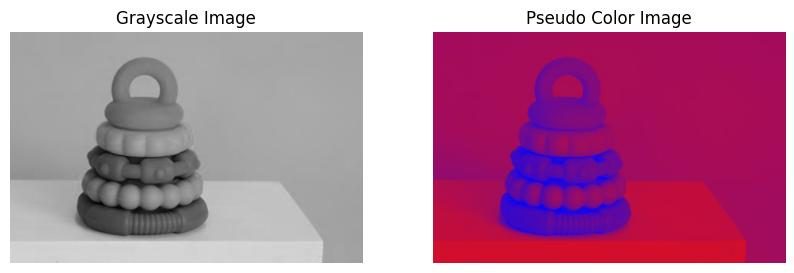

In [8]:
def grayscale_to_pseudo_color(image):
    pseudo_color_image = []
    for row in image:
        pseudo_color_row = [
            [
                int((pixel[0] / 255.0) * 255),  # Red transformation
                int((pixel[0] ** 0.5 / 255.0) * 255),  # Green transformation
                int((1.0 - pixel[0] / 255.0) * 255)   # Blue transformation
            ]
            for pixel in row
        ]
        pseudo_color_image.append(pseudo_color_row)
    return np.array(pseudo_color_image, dtype=np.uint8)

pseudo_color_image = grayscale_to_pseudo_color(gray_image)
show_images(gray_image, pseudo_color_image, "Grayscale Image", "Pseudo Color Image")

## Question 7: Replace Green Screen with Background Image
**Approach:**  
The green screen is identified by checking if the green channel is dominant in each pixel. Those pixels are replaced by corresponding pixels from the background image.

**Output:**  
The original foreground image with a green screen and the resulting image with the background replaced are displayed side by side.


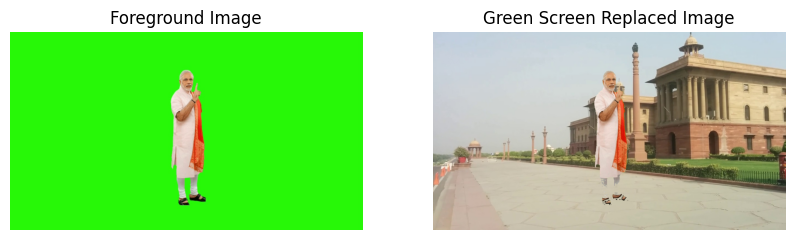

In [9]:
def replace_green_screen(foreground_image, background_image):
    if foreground_image.shape != background_image.shape:
        raise ValueError("Images must be of the same size")
    mask = (foreground_image[:, :, 1] > foreground_image[:, :, 0]) & (foreground_image[:, :, 1] > foreground_image[:, :, 2])
    merged_image = np.where(mask[:, :, np.newaxis], background_image, foreground_image)
    return merged_image

foreground = read_image('../media/modiji.jpg')
background = read_image('../media/parliament_bg.jpg')
result_image = replace_green_screen(bgr_to_rgb(foreground), bgr_to_rgb(background))
show_images(bgr_to_rgb(foreground), result_image, "Foreground Image", "Green Screen Replaced Image")

## Question 8: Convert Video to Sequence of Images and Back
**Approach:**  
This involves extracting each frame from the video as an image file, then reassembling the images back into a video file using a specified frame rate.

**Output:**  
Images extracted from the video are saved, and a new video is created from those images.


In [10]:
def video_to_images(video_path, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    cap = cv2.VideoCapture(video_path)
    
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        write_image(os.path.join(output_folder, f'frame_{frame_count:04d}.jpg'), frame)
        frame_count += 1
        
    cap.release()
    print(f"Extracted {frame_count} frames from the video.")

def images_to_video(input_folder, output_video_path, fps):
    images = sorted([img for img in os.listdir(input_folder) if img.startswith("frame")])
    if not images:
        raise ValueError("No images found in the input folder.")

    first_image_path = os.path.join(input_folder, images[0])
    frame = read_image(first_image_path)
    height, width, layers = frame.shape

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    for image in images:
        img_path = os.path.join(input_folder, image)
        frame = cv2.imread(img_path)
        out.write(frame)

    out.release()
    print(f"Video saved to {output_video_path}")
    
video_path = '../media/Venice_5.mp4'
output_folder = '../media/frames/'
output_video_path = '../media/output_video.mp4'
fps = 30

video_to_images(video_path, output_folder)
images_to_video(output_folder, output_video_path, fps)

Extracted 151 frames from the video.
Video saved to ../media/output_video.mp4


# Question 10: Create a fade transition between two images

## Approach:
- A fade transition is created by blending two images gradually over a series of frames.
- The blend factor (`alpha`) is varied linearly from 0 to 1 over the duration of the transition.

## Output:
- The fade transition video is successfully created and saved to the specified path.


In [11]:
def resize_image(image, target_height, target_width):
    height, width, _ = image.shape
    y_ratio = target_height / height
    x_ratio = target_width / width

    resized_image = np.zeros((target_height, target_width, 3), dtype=np.uint8)

    for i in range(target_height):
        for j in range(target_width):
            y = int(i / y_ratio)
            x = int(j / x_ratio)
            resized_image[i, j] = image[y, x]

    return resized_image

def create_fade_transition(image1_path, image2_path, output_video_path, duration=1, fps=30):
    image1 = cv2.imread(image1_path)
    image2 = cv2.imread(image2_path)
    
    height, width, _ = image1.shape
    image2 = resize_image(image2, height, width)
    
    total_frames = duration * fps
    
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    for frame_num in range(total_frames):
        alpha = frame_num / (total_frames - 1)  # Calculate alpha (fade factor)
        blended_frame = np.uint8(image1 * (1 - alpha) + image2 * alpha)
        out.write(blended_frame)
        
    out.release()
    print(f"Video saved to {output_video_path}")

image1_path = '../media/img1.webp'
image2_path = '../media/img2.webp'
output_video_path = '../media/fade_transition.mp4'

create_fade_transition(image1_path, image2_path, output_video_path)


Video saved to ../media/fade_transition.mp4
